In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Set a visually appealing style for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset, parsing the 'Date' column as datetime objects
df = pd.read_csv('stocks.csv', parse_dates=['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

print("Dataset loaded and 'Date' column set as index.")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Let's assume the stock we want to analyze is 'AAPL'
# You can change this to 'GOOGL', 'MSFT', etc.
stock_to_analyze = 'AAPL'
time_series = df[df['Ticker'] == stock_to_analyze]['Close']

Dataset loaded and 'Date' column set as index.

First 5 rows of the dataset:
           Ticker        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-02-07   AAPL  150.639999  155.229996  150.639999  154.649994  154.414230   
2023-02-08   AAPL  153.880005  154.580002  151.169998  151.919998  151.688400   
2023-02-09   AAPL  153.779999  154.330002  150.419998  150.869995  150.639999   
2023-02-10   AAPL  149.460007  151.339996  149.220001  151.009995  151.009995   
2023-02-13   AAPL  150.949997  154.259995  150.919998  153.850006  153.850006   

              Volume  
Date                  
2023-02-07  83322600  
2023-02-08  64120100  
2023-02-09  56007100  
2023-02-10  57450700  
2023-02-13  62199000  


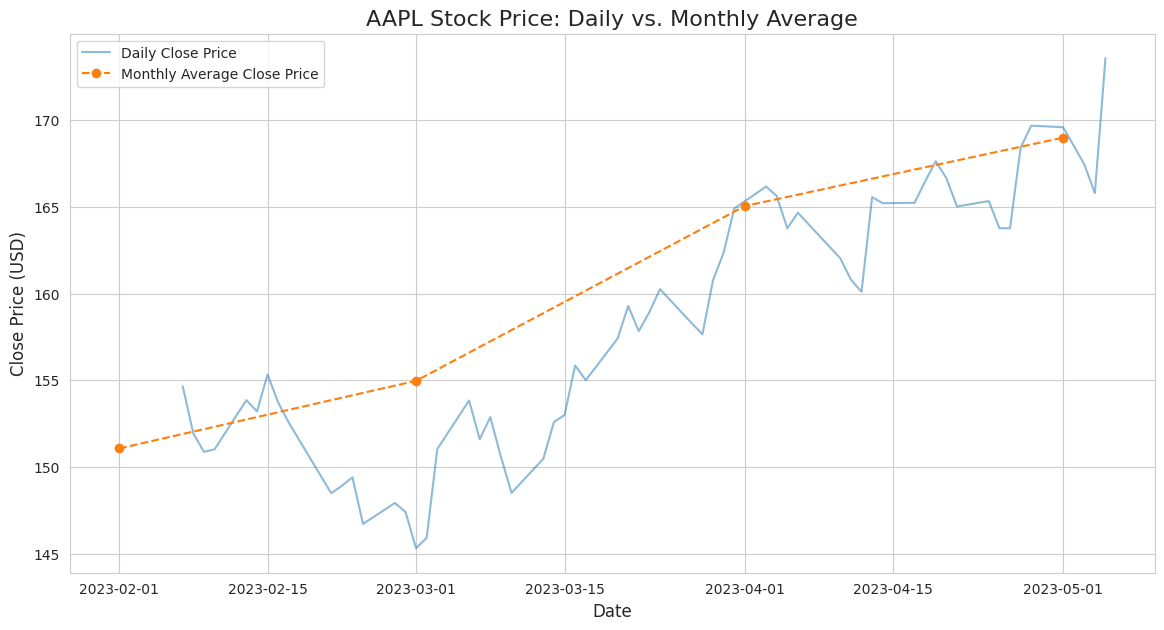

In [2]:
# Resample the daily data to get the average closing price at the start of each month
monthly_resampled_series = time_series.resample('MS').mean()

# Plot the daily vs. monthly resampled data
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Daily Close Price', alpha=0.5)
plt.plot(monthly_resampled_series, label='Monthly Average Close Price', linestyle='--', marker='o')
plt.title(f'{stock_to_analyze} Stock Price: Daily vs. Monthly Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.legend()
plt.show()

In [4]:
# Check the date range and length of your selected stock data
print(f"Data points available for this stock: {len(time_series)}")
print(f"Start date: {time_series.index.min().date()}")
print(f"End date: {time_series.index.max().date()}")

Data points available for this stock: 62
Start date: 2023-02-07
End date: 2023-05-05


In [5]:
# Check if we have enough data before attempting decomposition
MIN_OBSERVATIONS_FOR_DECOMPOSITION = 24

if len(monthly_resampled_series) >= MIN_OBSERVATIONS_FOR_DECOMPOSITION:
    # Decompose the monthly time series
    # We assume a yearly seasonality, so the period is 12 for monthly data
    decomposition = seasonal_decompose(monthly_resampled_series, model='additive', period=12)

    # Plot the decomposed components
    fig = decomposition.plot()
    fig.set_size_inches(14, 9)
    plt.suptitle('Time Series Decomposition of Monthly Stock Price', y=0.95, fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("--- Time Series Decomposition Skipped ---")
    print(f"The dataset is too short for a yearly seasonal decomposition.")
    print(f"This analysis requires at least {MIN_OBSERVATIONS_FOR_DECOMPOSITION} months of data, but the selected stock only has {len(monthly_resampled_series)} months.")

--- Time Series Decomposition Skipped ---
The dataset is too short for a yearly seasonal decomposition.
This analysis requires at least 24 months of data, but the selected stock only has 4 months.


In [7]:
# --- Perform the Augmented Dickey-Fuller test ---
print(f"--- Stationarity Test Results for {stock_to_analyze} ---")
adf_test = adfuller(time_series, autolag='AIC')

# Create a DataFrame to display the results clearly
adf_results = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_results[f'Critical Value ({key})'] = value

print(adf_results)

# --- Interpret the results ---
p_value = adf_test[1]
print("\n--- Interpretation ---")
if p_value <= 0.05:
    print(f"p-value = {p_value:.4f}. The data is likely stationary.")
else:
    print(f"p-value = {p_value:.4f}. The data is likely non-stationary.")

--- Stationarity Test Results for AAPL ---
Test Statistic                 -0.291693
p-value                         0.926673
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64

--- Interpretation ---
p-value = 0.9267. The data is likely non-stationary.
